In [1]:
# The following are the example python programs to solve first order DE.
# Copy and paste any program in a Jupyter Notebook cell of python in your system, and run to get the output. 
# Alternatively, you can do it on the online Jupyter Notebook available at https://jupyter.org/try
# Try Classic Notebook at this link, insert a new cell there, and copy-paste the program given below.
# Sympy is a python package for symbolic mathematical calculations. 
# It would be helpful to read some basic usage of Sympy from the links.
# https://maths-with-python.readthedocs.io/en/latest/07-sympy.html
# https://www.sympy.org/en/index.html

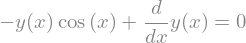

In [2]:
# Python program to solve the DE: y’-y cos(x)=0 
import sympy as sy # Importing Sympy for symbolic calculations
sy.init_printing() # For LaTeX formatted output
from IPython.display import display # For displaying the output
x = sy.symbols('x'); y = sy.symbols('y', cls=sy.Function) # Declaring the symbols
DE = sy.Eq(y(x).diff(x)-y(x)*sy.cos(x),0) # Entering the DE: y’-y cos(x)=0
display(DE) # Display the entered DE
sol = sy.dsolve(DE,y(x)) # Solving the DE using dsolve from Sympy
display(sol) # Display the solution

In [3]:
# You can also write your own program to solve the DE: y’-y cos(x)=0 without using dsolve. 
import sympy as sy # Importing Sympy for symbolic calculations
sy.init_printing() # For LaTeX formatted output
from IPython.display import display # For displaying the output
x,y,C_1 = sy.symbols('x y C_1') # Declaring the symbols
sol = sy.Eq(sy.integrate(1/y,y)+sy.integrate(-sy.cos(x),x),C_1)
display(sol)

Given DE is not exact but its IF2 is


And solution is


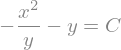

In [4]:
# Solve the exact DE: Mdx+Ndy=0. Below for example, we solve 2xydx+(x^2-y^2)dy=0
import sympy as sy
sy.init_printing() # for LaTeX formatted output
from IPython.display import display
x = sy.symbols('x'); y = sy.symbols('y');C = sy.symbols('C')
M=-2*x*y # Enter M here
N=x**2-y**2 # Enter N here
IF1=sy.exp(sy.integrate(sy.simplify((sy.diff(M,y)-sy.diff(N,x))/N),x))
IF2=sy.exp(sy.integrate(sy.simplify((-sy.diff(M,y)+sy.diff(N,x))/M),y))
IF3=sy.simplify(1/(M*x+N*y))
if sy.simplify(sy.diff(M,y)-sy.diff(N,x))==0:
    print('Given DE is exact and its solution is')
    I=sy.Eq(sy.integrate(M,x)+sy.integrate(N-sy.diff(sy.integrate(M,x),y),y),C)
    display(I)
elif(sy.simplify(sy.diff(M*IF1,y)-sy.diff(N*IF1,x))==0):
    print('Given DE is not exact but its IF1 is')
    display(IF1)
    print('And solution is')
    I=sy.Eq(sy.integrate(M*IF1,x)+sy.integrate(N*IF1-sy.diff(sy.integrate(M*IF1,x),y),y),C)
    display(I)
elif(sy.simplify(sy.diff(M*IF2,y)-sy.diff(N*IF2,x))==0):
    print('Given DE is not exact but its IF2 is')
    display(IF2)
    print('And solution is')
    I=sy.Eq(sy.integrate(M*IF2,x)+sy.integrate(N*IF2-sy.diff(sy.integrate(M*IF2,x),y),y),C)
    display(I)
elif(sy.simplify(sy.diff(M*IF3,y)-sy.diff(N*IF3,x))==0):
    print('Given DE is not exact but its IF3 is')
    display(IF3)
    print('And solution is')
    I=sy.Eq(sy.integrate(M*IF3,x)+
    sy.integrate(N*IF3-sy.diff(sy.integrate(M*IF3,x),y),y),C)
    display(I)
else:
    print('Given DE is not exact, and we do not have IF')

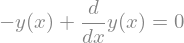

In [5]:
# Solve the DE y'-y=0 with the condition y(0)=1
import sympy as sy
sy.init_printing() # for LaTeX formatted output
from IPython.display import display
x = sy.symbols('x'); y = sy.symbols('y', cls=sy.Function)
#Enter the DE: y'-y=0
a1=1;a0=-1;r=0
DE = sy.Eq(a1*y(x).diff(x) + a0*y(x), r)
# Print the DE
display(DE)
# Solve the DE
sol = sy.dsolve(DE,y(x))
# Print the solution
display(sol)
# Solving C1 from the intial conditions y(0)=1
constants = sy.solve([sol.rhs.subs(x,0) - 1])
display(constants)
# Final solution
C1 = sy.symbols('C1')
fsol = sol.subs(constants)
display(fsol)

                 x = [0.  0.5 1.  1.5 2. ]
Numerical Solution = [1.         1.64872127 2.71828191 4.48168924 7.3890564 ]
    Exact Solution = [1.         1.64872127 2.71828183 4.48168907 7.3890561 ]


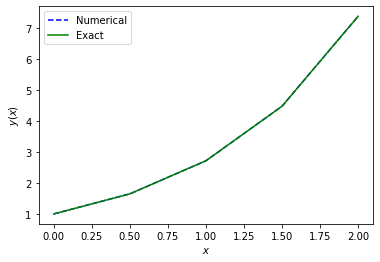

In [6]:
# Numerical solution of the DE: y’=a*y+b, y(x0)=y0. For example, here we solve y'=y, y(0)=1.
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# Consider the DE: y'=y
def dydx(y, x):
    return y
x = np.linspace(0, 2, 5) # It stores five x-values in the interval [0,2], as printed below. 
w = odeint(dydx, [1], x) # Here [1] stands for the initial condition y(0)=1
y = w[:,0] # It stores the numerical solution of the DE at the chosen 5 x-values.
print('                 x =',x) # It prints the chosen 5 x-values
print('Numerical Solution =',y) # It prints the numerical solution of the DE at the chosen 5 x-values.
def f(x):   # Here f defines the exact solution y=f(x)=e^x of y'=y, y(0)=1.
    return np.exp(x)
print('    Exact Solution =',f(x)) # It prints the exact solution of the DE at the chosen 5 x-values.
# We see that the numerical and exact soltions match with high accuracy at the chosen 5 x-values.
# Let us plot the two solution curves by using the five points.
plt.plot(x,y,'b--',label='Numerical') # Plotting the numerical solution 
plt.plot(x,f(x),'g',label='Exact') # Plotting the exact solution y=e^x
plt.legend(loc="best")
plt.xlabel('$x$')
plt.ylabel('$y(x)$')
plt.show()
# Notice that the two solution curves (numerical and exact) overlap each other, as expected.